In [89]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [90]:
df = pd.read_csv("../../../data/Student_Performance.csv")
df.shape

(10000, 6)

In [91]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [92]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [94]:
pd.isnull(df).sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [95]:
dupplicate = df.duplicated().sum()
print(dupplicate)

127


In [96]:
df = df.drop_duplicates()

In [97]:
print(df.duplicated().sum())

0


In [98]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

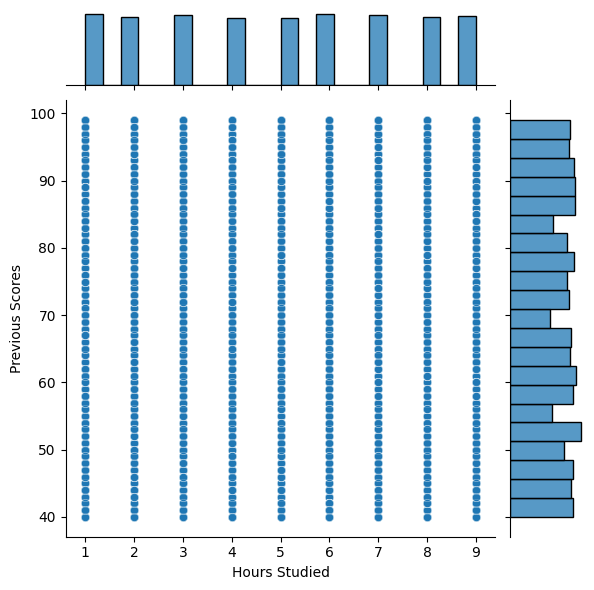

In [99]:
sns.jointplot(x="Hours Studied", y="Previous Scores", data=df, kind="scatter", alpha= 0.5)
plt.show()

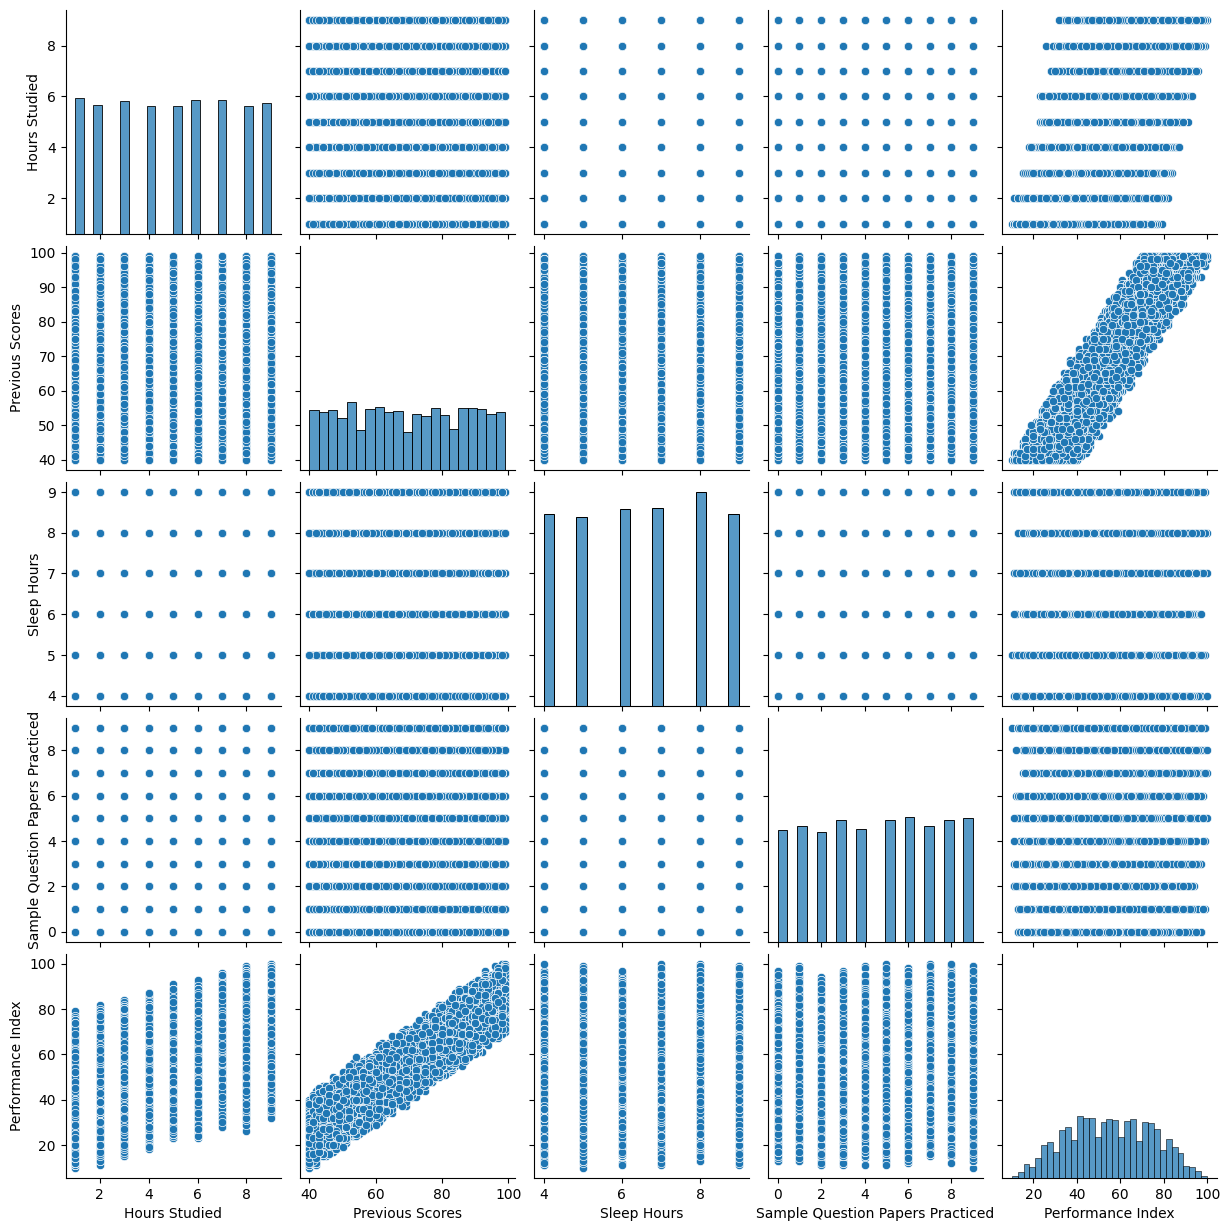

In [100]:
sns.pairplot(df)
plt.show()

In [101]:
df[["Performance Index", "Previous Scores"]].corr()

,Performance Index,Previous Scores
Performance Index,1.000000,0.915135
Previous Scores,0.915135,1.000000


Comme la corrélation est très proche de 1 on a une corrélation positive 

In [102]:
X = df[["Previous Scores"]]
y = df["Performance Index"]

In [103]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [104]:
from sklearn.linear_model import LinearRegression

ln = LinearRegression()

ln.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [105]:
ln.coef_

array([1.01658124])

In [106]:
prediction = ln.predict(X_test)

Text(0, 0.5, 'Predicted Performance Index')

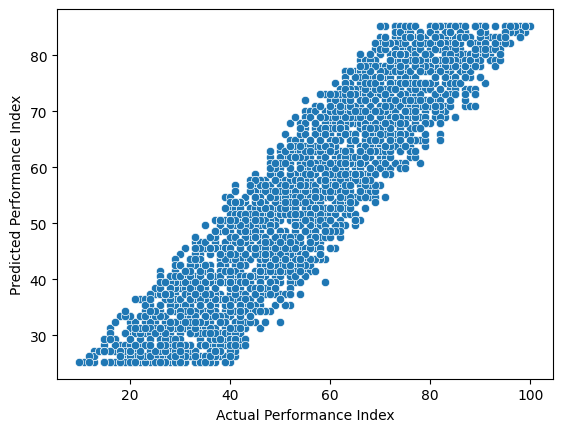

In [111]:
sns.scatterplot(x=y_test, y=prediction)
plt.xlabel("Actual Performance Index")
plt.ylabel("Predicted Performance Index")


In [108]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

In [109]:
print("Mean Absolute Error :", mean_absolute_error(y_test, prediction))
print("Mean Squarred Error :", mean_squared_error(y_test, prediction))
print("RMSE ", math.sqrt(mean_squared_error(y_test, prediction)))

Mean Absolute Error : 6.692957323251174
Mean Squarred Error : 60.65179830080513
RMSE  7.787926444234379


In [110]:
score = ln.score(X_train, y_train)
print(f"Model determination : ", score)

Model determination :  0.8389026372283157


In [113]:
df[["Performance Index", "Hours Studied"]].corr()

,Performance Index,Hours Studied
Performance Index,1.000000,0.375332
Hours Studied,0.375332,1.000000


In [118]:
X = df[["Hours Studied", "Previous Scores", "Sample Question Papers Practiced", "Sleep Hours"]] 
y = df["Performance Index"]

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
ln = LinearRegression()
ln.fit(X_train, y_train)
prediction = ln.predict(X_test)

array([46.19389262, 79.97506661, 60.74657212, ..., 29.79877399,
       51.6316759 , 65.1624846 ], shape=(2962,))

In [122]:
score = ln.score(X_train, y_train)
print(f"Model determination : ", score)

Model determination :  0.9886846097761028


In [ ]:
score_test = ln.score(X_test, y_test)
print("R² test:", score_test)

R² test: 0.9877951433026941


Le R² test ≈ 0.988 est très proche de ton R² train (≈0.989).

Cela signifie que le modèle généralise très bien, il n’y a quasiment pas de surapprentissage (overfitting).

Autrement dit, les 4 features expliquent presque toute la variation du Performance Index, et le modèle peut prédire de nouvelles données avec une bonne précision.